# Explore

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud

### Exercise

### 1.Spam Data

### a. Load the spam data set.

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1])
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?  

In [4]:
def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
def tokenize(string):
    '''
    This function takes in a string and returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [6]:
def lemmatize(string):
    '''
    This function takes in string for and returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [7]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords


In [8]:
df['text_cleaned'] = df.text.apply(basic_clean)
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [9]:
# (a|b)
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


In [10]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)
all_words = ' '.join(df.text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words) 

In [11]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head() 

call    551
im      450
get     351
ur      343
dont    257
dtype: int64

In [12]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [13]:
word_counts.sort_values(by='all', ascending=False).head(10) 

,all,ham,spam
call,551,209,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,250,245,5
ltgt,248,248,0
go,246,218,27
free,240,49,191
know,227,214,13


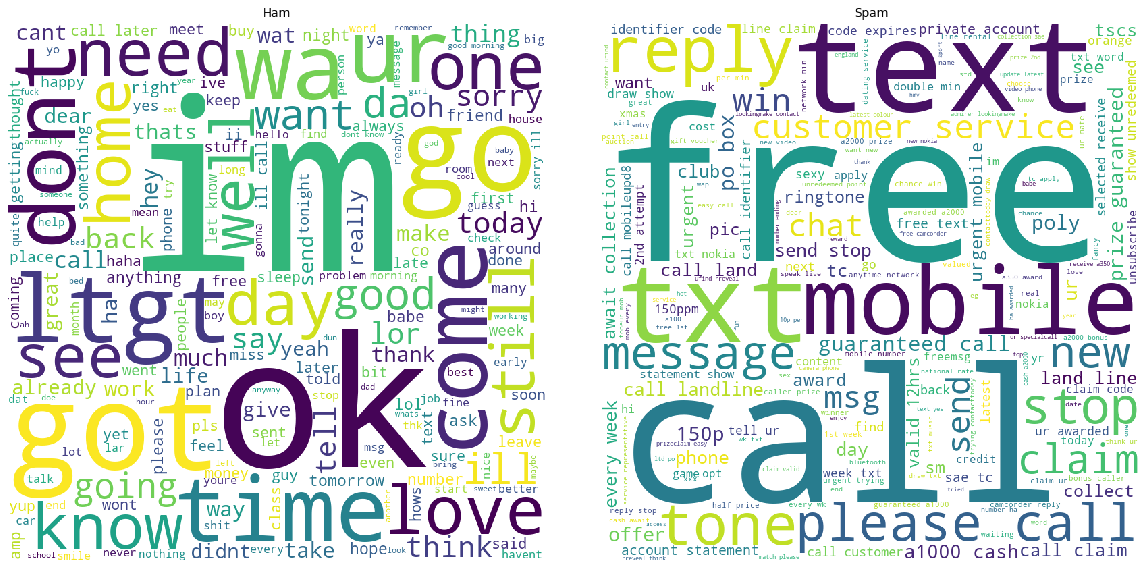

In [14]:
ham_cloud = WordCloud(background_color='white',
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='white', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [15]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head() 

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [16]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20) 
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)

In [17]:
ham_bigrams

(call, later)      47
(ill, call)        45
(let, know)        41
(sorry, ill)       39
(good, morning)    31
(dont, know)       31
(new, year)        26
(pls, send)        22
(take, care)       21
(im, going)        20
(ok, lor)          20
(ltgt, min)        19
(good, night)      19
(im, gonna)        19
(last, night)      18
(hi, hi)           18
(great, day)       17
(happy, new)       15
(like, ltgt)       14
(send, message)    14
dtype: int64

In [18]:
spam_bigrams

(please, call)          43
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(prize, guaranteed)     22
(a1000, cash)           20
(every, week)           19
(send, stop)            19
(urgent, mobile)        18
(land, line)            18
(await, collection)     18
(valid, 12hrs)          17
(account, statement)    16
(claim, call)           16
(sae, tc)               16
(call, customer)        15
(call, mobileupd8)      15
(reply, call)           15
(call, 08000930705)     15
(selected, receive)     15
dtype: int64

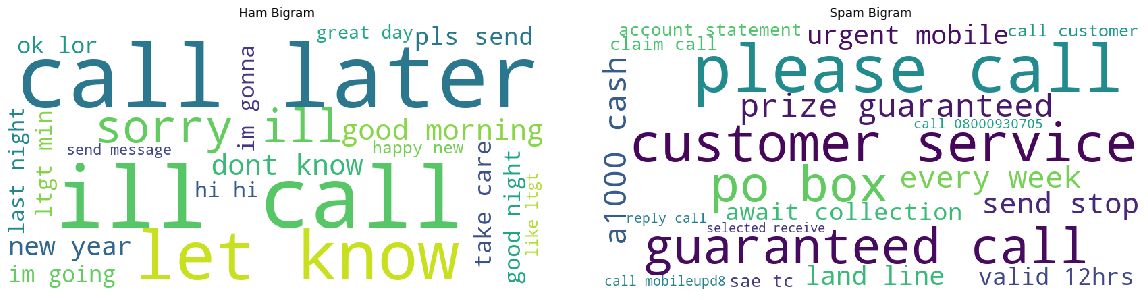

In [19]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
spam_data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

ham_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_data)

spam_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_data)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_bigram_cloud)
axs[1].imshow(spam_bigram_cloud)

axs[0].set_title('Ham Bigram')
axs[1].set_title('Spam Bigram')

for ax in axs: ax.axis('off') 

### c. Is there any overlap in the bigrams for the spam data and the ham data?    

Not really

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [20]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head() 

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams,trigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)...","[(go, jurong, point), (jurong, point, crazy), ..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]","[(ok, lar, joking), (lar, joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ...","[(free, entrywkly, comp), (entrywkly, comp, wi..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h...","[(u, dun, say), (dun, say, early), (say, early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,...","[(nah, dont, think), (dont, think, go), (think..."


In [21]:
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20) 

In [22]:
ham_trigrams

(ill, call, later)            38
(sorry, ill, call)            38
(happy, new, year)            13
(pick, phone, right)          12
(right, pls, send)            12
(phone, right, pls)           12
(pls, send, message)          12
(cant, pick, phone)           12
(hi, hi, hi)                  11
(good, morning, dear)          7
(kiss, across, sea)            6
(pls, convey, birthday)        6
(convey, birthday, wish)       6
(said, happy, bday)            5
(ha, set, callertune)          5
(work, even, colleague)        5
(cabin, pa, said)              5
(minute, ok, sed)              5
(felt, special, askdlunch)     5
(set, callertune, caller)      5
dtype: int64

In [23]:
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(private, 2003, account)               13
(2003, account, statement)             13
(reply, call, 08000930705)             13
(show, 800, unredeemed)                12
(guaranteed, a1000, cash)              12
(camcorder, reply, call)               12
(bonus, caller, prize)                 11
(anytime, network, min)                11
(every, week, txt)                     11
(please, call, customer)               10
(cash, await, collection)              10
(a2000, bonus, caller)                 10
(customer, service, representative)    10
(draw, txt, music)                      9
(a2000, prize, guaranteed)              9
(contacttoday, draw, show)              9
(mobile, number, ha)                    9
dtype: int64

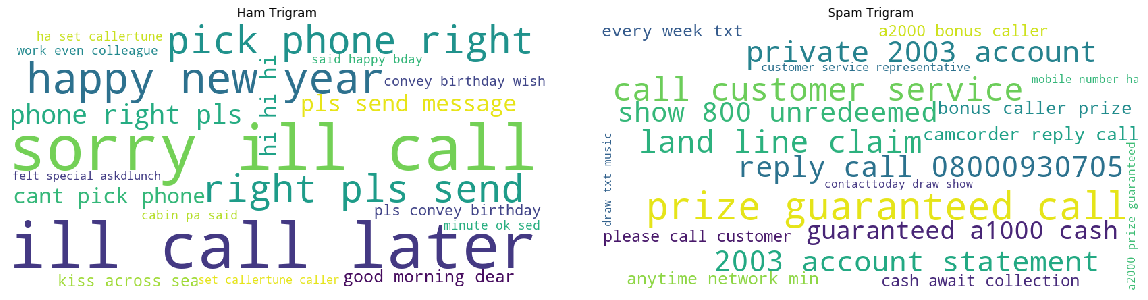

In [24]:
ham_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
spam_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}

ham_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(ham_tridata)

spam_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(spam_tridata)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(ham_trigram_cloud)
axs[1].imshow(spam_trigram_cloud)

axs[0].set_title('Ham Trigram')
axs[1].set_title('Spam Trigram')

for ax in axs: ax.axis('off') 

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [25]:
import acquire
import prepare

from requests import get
from bs4 import BeautifulSoup
import os

In [26]:
urls = acquire.get_all_urls()

df = acquire.get_blog_articles(urls)

df

,title,content
0,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug..."
1,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ..."
2,What is Machine Learning?,"There’s a lot we can learn about machines, and..."
3,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will..."
4,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...
5,What Data Science Career is For You?,If you’re struggling to see yourself as a data...
6,How to Succeed in a Coding Bootcamp,We held a virtual event called “How to Succeed...
7,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...
8,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...
9,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...


In [27]:
df['content_cleaned'] = df.content.apply(basic_clean)
df['content_tokenized'] = df.content_cleaned.apply(tokenize)
df['content_lemmatized'] = df.content_tokenized.apply(lemmatize)
df['content_filtered'] = df.content_lemmatized.apply(remove_stopwords)
df.head()

,title,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered
0,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...
1,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...
2,What is Machine Learning?,"There’s a lot we can learn about machines, and...",theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...
3,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",coming into our data science program you will ...,coming into our data science program you will ...,coming into our data science program you will ...,coming data science program need know math sta...
4,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...,butterflies in my belly my stomach is tied up ...,butterflies in my belly my stomach is tied up ...,butterfly in my belly my stomach is tied up in...,butterfly belly stomach tied knot know im taki...


In [28]:
# (a|b)
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.content_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

df 

,title,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words
0,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...,"[houston, problem, arent, enough, software, de..."
1,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,..."
2,What is Machine Learning?,"There’s a lot we can learn about machines, and...",theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...,"[lot, learn, machine, lot, machine, learnever,..."
3,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",coming into our data science program you will ...,coming into our data science program you will ...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m..."
4,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...,butterflies in my belly my stomach is tied up ...,butterflies in my belly my stomach is tied up ...,butterfly in my belly my stomach is tied up in...,butterfly belly stomach tied knot know im taki...,"[butterfly, belly, stomach, tied, knot, know, ..."
5,What Data Science Career is For You?,If you’re struggling to see yourself as a data...,if youre struggling to see yourself as a data ...,if youre struggling to see yourself as a data ...,if youre struggling to see yourself a a data s...,youre struggling see data science professional...,"[youre, struggling, see, data, science, profes..."
6,How to Succeed in a Coding Bootcamp,We held a virtual event called “How to Succeed...,we held a virtual event called how to succeed ...,we held a virtual event called how to succeed ...,we held a virtual event called how to succeed ...,held virtual event called succeed coding bootc...,"[held, virtual, event, called, succeed, coding..."
7,Codeup Grads Win CivTech Datathon,Many Codeup alumni enjoy competing in hackatho...,many codeup alumni enjoy competing in hackatho...,many codeup alumni enjoy competing in hackatho...,many codeup alumnus enjoy competing in hackath...,many codeup alumnus enjoy competing hackathons...,"[many, codeup, alumnus, enjoy, competing, hack..."
8,How Codeup Alumni are Helping to Make Water,Imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine having a kit mailed to you with all th...,imagine kit mailed necessary component make co...,"[imagine, kit, mailed, necessary, component, m..."
9,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...,were excited to announce a huge codeup achieve...,were excited to announce a huge codeup achieve...,were excited to announce a huge codeup achieve...,excited announce huge codeup achievement inc m...,"[excited, announce, huge, codeup, achievement,..."


In [29]:
title_0 = ' '.join(df[df.title=='What Data Science Career is For You?'].content_filtered) 
title_1 = ' '.join(df[df.title=='What is Codeup’s Application Process?'].content_filtered)
title_2 = ' '.join(df[df.title=='What are the Math and Stats Principles You Need for Data Science?'].content_filtered)
title_3 = ' '.join(df[df.title=='What to Expect at Codeup'].content_filtered)
title_4 = ' '.join(df[df.title=='What is the Transition into Data Science Like?'].content_filtered)
title_5 = ' '.join(df[df.title=='How We’re Celebrating World Mental Health Day From Home '].content_filtered)
title_6 = ' '.join(df[df.title=='How to Succeed in a Coding Bootcamp'].content_filtered)
title_7 = ' '.join(df[df.title=='How Codeup Alumni Helped Dallas Youth Fight COVID-19'].content_filtered)
title_8 = ' '.join(df[df.title=='Introducing Our Salary Refund Guarantee'].content_filtered)
title_9 = ' '.join(df[df.title=='Announcing: The Annie Easley Scholarship to Support the Black Community in Tech'].content_filtered)
title_10 = ' '.join(df[df.title=='Build Your Career in Tech: Advice from Alumni!'].content_filtered)
title_11 = ' '.join(df[df.title=='Alumni Share their Journey into Web Development'].content_filtered)
title_12 = ' '.join(df[df.title=='Codeup on Inc. 5000 Fastest Growing Private Companies in America!'].content_filtered)
title_13 = ' '.join(df[df.title=='Your Education is an Investment'].content_filtered)
title_14 = ' '.join(df[df.title=='How Codeup Alumni are Helping to Make Water'].content_filtered)
title_15 = ' '.join(df[df.title=='From Slacker to Data Scientist: Journey to Data Science Without a Degree'].content_filtered)
title_16 = ' '.join(df[df.title=='Codeup Launches Houston!'].content_filtered)
title_17 = ' '.join(df[df.title=='What is Machine Learning?'].content_filtered)
title_18 = ' '.join(df[df.title=='What is Python?'].content_filtered)
title_19 = ' '.join(df[df.title=='Codeup Grads Win CivTech Datathon'].content_filtered)
all_words = ' '.join(df.content_filtered)

title_0 = re.sub(r'\s.\s', '', title_0)
title_1 = re.sub(r'\s.\s', '', title_1)
title_2 = re.sub(r'\s.\s', '', title_2)
title_3 = re.sub(r'\s.\s', '', title_3)
title_4 = re.sub(r'\s.\s', '', title_4)
title_5 = re.sub(r'\s.\s', '', title_5)
title_6 = re.sub(r'\s.\s', '', title_6)
title_7 = re.sub(r'\s.\s', '', title_7)
title_8 = re.sub(r'\s.\s', '', title_8)
title_9 = re.sub(r'\s.\s', '', title_9)
title_10 = re.sub(r'\s.\s', '', title_10)
title_11 = re.sub(r'\s.\s', '', title_11)
title_12 = re.sub(r'\s.\s', '', title_12)
title_13 = re.sub(r'\s.\s', '', title_13)
title_14 = re.sub(r'\s.\s', '', title_14)
title_15 = re.sub(r'\s.\s', '', title_15)
title_16 = re.sub(r'\s.\s', '', title_16)
title_17 = re.sub(r'\s.\s', '', title_17)
title_18 = re.sub(r'\s.\s', '', title_18)
title_19 = re.sub(r'\s.\s', '', title_19)
all_words = re.sub(r'\s.\s', '', all_words)

all_words

'houston problem arent enough software developeryear helping adult transition tech career san antonioyear operating dallas time spread codeup even farther across texas better place houston largest city texas one top five largest city country houston houston demand tech talent high population vast diverse texas still ha 10th largest economy world commitment placing graduate real tech job go demand employer partnership lead doe mean class remote launching new campus pandemic wont change much student perspective like people across texas enroll program class continue remote safe open campus however physical presence houston able better expand employer partnership build network student get best experience possible career option become software developer 22 week virtual fullstack web development program class conducted live via zoom along classmate interested building custom application learn bring idea life codeup wont officially launching data science program houston people across texas st

In [30]:
title_0_freq = pd.Series(title_0.split()).value_counts()
title_1_freq = pd.Series(title_1.split()).value_counts()
title_2_freq = pd.Series(title_2.split()).value_counts()
title_3_freq = pd.Series(title_3.split()).value_counts()
title_4_freq = pd.Series(title_4.split()).value_counts()
title_5_freq = pd.Series(title_5.split()).value_counts()
title_6_freq = pd.Series(title_6.split()).value_counts()
title_7_freq = pd.Series(title_7.split()).value_counts()
title_8_freq = pd.Series(title_8.split()).value_counts()
title_9_freq = pd.Series(title_9.split()).value_counts()
title_10_freq = pd.Series(title_10.split()).value_counts()
title_11_freq = pd.Series(title_11.split()).value_counts()
title_12_freq = pd.Series(title_12.split()).value_counts()
title_13_freq = pd.Series(title_13.split()).value_counts()
title_14_freq = pd.Series(title_14.split()).value_counts()
title_15_freq = pd.Series(title_15.split()).value_counts()
title_16_freq = pd.Series(title_16.split()).value_counts()
title_17_freq = pd.Series(title_17.split()).value_counts()
title_18_freq = pd.Series(title_18.split()).value_counts()
title_19_freq = pd.Series(title_19.split()).value_counts()
all_words_freq = pd.Series(all_words.split()).value_counts() 

all_words_freq.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


data       137
codeup     106
wa          67
science     51
job         51
dtype: int64

In [31]:
word_counts = (pd.concat([all_words_freq, title_0_freq, title_1_freq, title_2_freq, title_3_freq, title_4_freq, title_5_freq, title_6_freq, title_7_freq, title_8_freq, title_9_freq, title_10_freq, title_11_freq, title_12_freq, title_13_freq, title_14_freq, title_15_freq, title_16_freq, title_17_freq, title_18_freq, title_19_freq], axis=1, sort=True)
               .set_axis(['all', 'title_0', 'title_1', 'title_2', 'title_3', 'title_4', 'title_5', 'title_6', 'title_7', 'title_8', 'title_9', 'title_10', 'title_11', 'title_12', 'title_13', 'title_14', 'title_15', 'title_16', 'title_17', 'title_18', 'title_19'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='all', ascending=False).head(10)

,all,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,...,title_10,title_11,title_12,title_13,title_14,title_15,title_16,title_17,title_18,title_19
data,137,31,6,7,1,20,0,0,6,0,...,5,0,2,0,1,13,4,9,20,10
codeup,106,3,4,1,15,14,0,3,0,3,...,13,8,6,7,6,9,2,1,0,6
wa,67,0,0,0,1,18,0,0,0,0,...,0,13,1,0,0,27,0,1,0,4
job,51,3,1,0,9,7,0,0,0,1,...,11,5,2,3,0,7,1,1,0,0
learning,51,7,0,2,8,5,0,5,1,0,...,0,0,1,1,0,10,0,8,3,0
science,51,7,4,6,1,7,0,0,0,0,...,4,0,1,0,0,8,3,2,2,3
like,48,7,0,1,4,8,0,4,1,1,...,4,3,0,0,0,3,1,3,2,1
student,44,0,2,0,7,2,0,6,4,4,...,2,3,1,0,5,1,2,0,0,2
learn,43,1,2,3,1,9,0,2,0,1,...,8,1,1,0,0,2,2,8,0,1
help,43,6,3,1,4,2,0,5,0,0,...,8,2,1,2,1,3,0,0,1,1


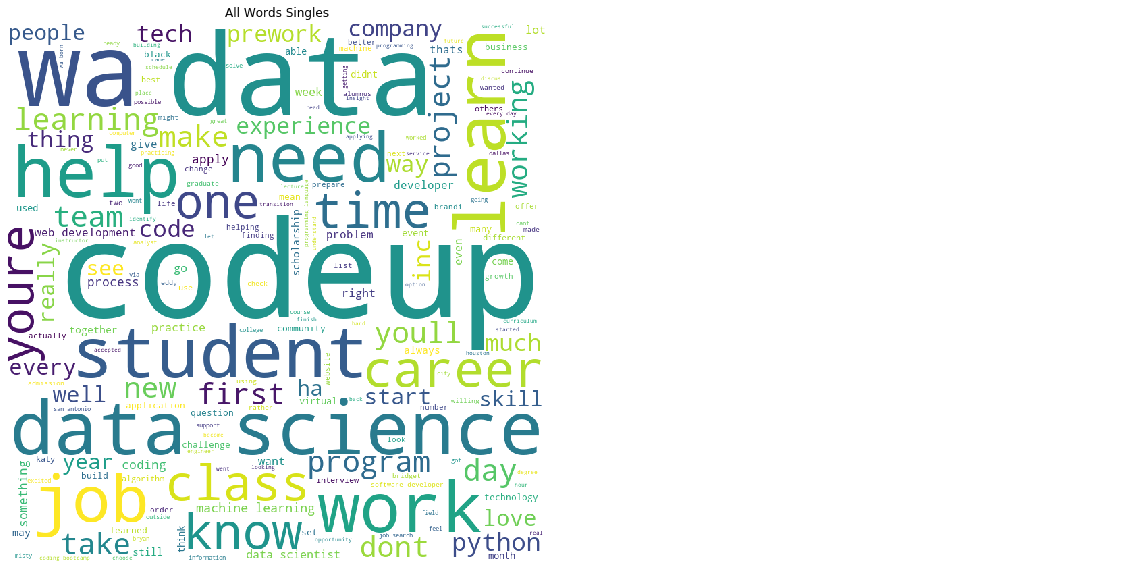

In [32]:
all_words_cloud = WordCloud(background_color='white',
                      height=800, width=800).generate(all_words)



plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(all_words_cloud)


axs[0].set_title('All Words Singles')


for ax in axs: ax.axis('off') 

In [33]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,title,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words,bigrams
0,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...,"[houston, problem, arent, enough, software, de...","[(houston, problem), (problem, arent), (arent,..."
1,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,...","[(bryan, walsh), (walsh, codeup), (codeup, web..."
2,What is Machine Learning?,"There’s a lot we can learn about machines, and...",theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...,"[lot, learn, machine, lot, machine, learnever,...","[(lot, learn), (learn, machine), (machine, lot..."
3,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",coming into our data science program you will ...,coming into our data science program you will ...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m...","[(coming, data), (data, science), (science, pr..."
4,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...,butterflies in my belly my stomach is tied up ...,butterflies in my belly my stomach is tied up ...,butterfly in my belly my stomach is tied up in...,butterfly belly stomach tied knot know im taki...,"[butterfly, belly, stomach, tied, knot, know, ...","[(butterfly, belly), (belly, stomach), (stomac..."


In [34]:
all_words_bigrams = pd.Series(list(nltk.ngrams(all_words.split(), 2))).value_counts().head(20)
all_words_bigrams 

(data, science)            48
(machine, learning)        19
(data, scientist)          16
(web, development)         15
(inc, 5000)                12
(software, developer)       9
(job, search)               8
(every, day)                7
(san, antonio)              7
(codeup, alumnus)           7
(programming, language)     7
(codeup, student)           7
(wa, born)                  7
(feel, like)                6
(get, job)                  6
(application, process)      6
(start, date)               6
(coding, bootcamp)          6
(make, sure)                6
(placement, team)           6
dtype: int64

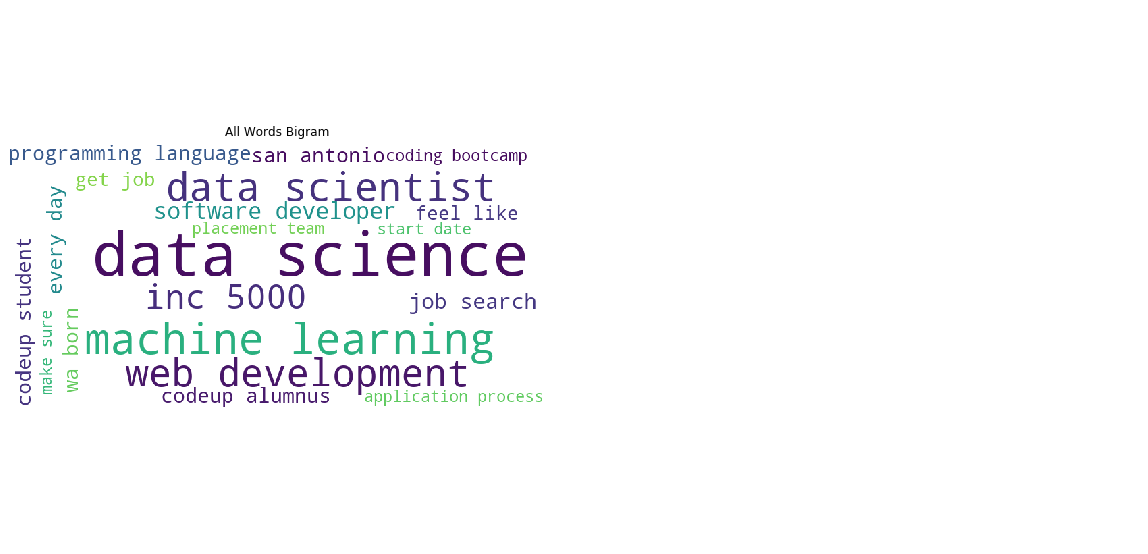

In [35]:
all_words_data = {k[0] + ' ' + k[1] : v for k, v in all_words_bigrams.to_dict().items()}


all_words_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(all_words_data)


plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(all_words_bigram_cloud)


axs[0].set_title('All Words Bigram')


for ax in axs: ax.axis('off') 

In [36]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head() 

,title,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words,bigrams,trigrams
0,Codeup Launches Houston!,"Houston, we have a problem: there aren’t enoug...",houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston we have a problem there arent enough s...,houston problem arent enough software develope...,"[houston, problem, arent, enough, software, de...","[(houston, problem), (problem, arent), (arent,...","[(houston, problem, arent), (problem, arent, e..."
1,Build Your Career in Tech: Advice from Alumni!,"Bryan Walsh, Codeup Web Development alum, and ...",bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum and mi...,bryan walsh codeup web development alum misty ...,"[bryan, walsh, codeup, web, development, alum,...","[(bryan, walsh), (walsh, codeup), (codeup, web...","[(bryan, walsh, codeup), (walsh, codeup, web),..."
2,What is Machine Learning?,"There’s a lot we can learn about machines, and...",theres a lot we can learn about machines and t...,theres a lot we can learn about machines and t...,there a lot we can learn about machine and the...,lot learn machine lot machine learn u ever won...,"[lot, learn, machine, lot, machine, learnever,...","[(lot, learn), (learn, machine), (machine, lot...","[(lot, learn, machine), (learn, machine, lot),..."
3,What are the Math and Stats Principles You Nee...,"Coming into our Data Science program, you will...",coming into our data science program you will ...,coming into our data science program you will ...,coming into our data science program you will ...,coming data science program need know math sta...,"[coming, data, science, program, need, know, m...","[(coming, data), (data, science), (science, pr...","[(coming, data, science), (data, science, prog..."
4,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...,butterflies in my belly my stomach is tied up ...,butterflies in my belly my stomach is tied up ...,butterfly in my belly my stomach is tied up in...,butterfly belly stomach tied knot know im taki...,"[butterfly, belly, stomach, tied, knot, know, ...","[(butterfly, belly), (belly, stomach), (stomac...","[(butterfly, belly, stomach), (belly, stomach,..."


In [37]:
all_words_trigrams = pd.Series(list(nltk.ngrams(all_words.split(), 3))).value_counts().head(20)
all_words_trigrams 

(data, science, program)            6
(career, data, science)             5
(data, science, cohort)             5
(machine, learning, model)          5
(make, water, program)              4
(salary, refund, guarantee)         3
(web, development, program)         3
(world, mental, health)             3
(help, job, search)                 3
(codeups, application, process)     3
(mental, health, day)               3
(2020, inc, 5000)                   3
(first, data, science)              3
(james, murralles, ted)             2
(scientist, software, developer)    2
(make, sure, youre)                 2
(via, metropolitan, transit)        2
(student, san, antonio)             2
(data, scientist, software)         2
(job, placement, team)              2
dtype: int64

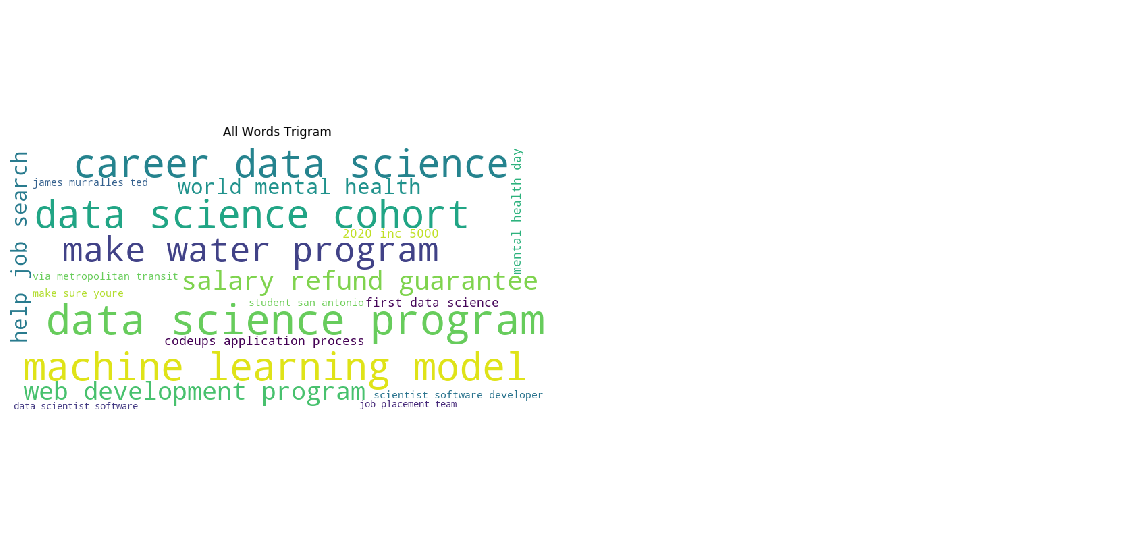

In [38]:
all_words_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in all_words_trigrams.to_dict().items()}

all_words_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(all_words_tridata) 

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(all_words_trigram_cloud)

axs[0].set_title('All Words Trigram')

for ax in axs: ax.axis('off') 

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [39]:
df = acquire.get_news_articles()
df.head()

,topic,title,author,content
0,business,"Our COVID-19 vaccine 95% effective, has no ser...",Pragya Swastik,America's Pfizer said final results from late-...
1,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...


In [40]:
labels = pd.concat([df.topic.value_counts(),
                    df.topic.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
technology,25,0.252525
business,25,0.252525
sports,25,0.252525
entertainment,24,0.242424


In [41]:
df['content_cleaned'] = df.content.apply(basic_clean)
df['content_tokenized'] = df.content_cleaned.apply(tokenize)
df['content_lemmatized'] = df.content_tokenized.apply(lemmatize)
df['content_filtered'] = df.content_lemmatized.apply(remove_stopwords)
df.head()

,topic,title,author,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered
0,business,"Our COVID-19 vaccine 95% effective, has no ser...",Pragya Swastik,America's Pfizer said final results from late-...,americas pfizer said final results from latest...,americas pfizer said final results from latest...,america pfizer said final result from latestag...,america pfizer said final result latestage tri...
1,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,the centre has imposed a 30day moratorium on l...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait on tuesday said a proposal t...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...


In [42]:
# (a|b)
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.content_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

df

,topic,title,author,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words
0,business,"Our COVID-19 vaccine 95% effective, has no ser...",Pragya Swastik,America's Pfizer said final results from late-...,americas pfizer said final results from latest...,americas pfizer said final results from latest...,america pfizer said final result from latestag...,america pfizer said final result latestage tri...,"[america, pfizer, said, final, result, latesta..."
1,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,the centre has imposed a 30day moratorium on l...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...,"[centre, ha, imposed, 30day, moratorium, laksh..."
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,"[serum, institute, india, ceo, adar, poonawall..."
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait on tuesday said a proposal t...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ..."
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ..."
...,...,...,...,...,...,...,...,...,...
94,entertainment,"Manoj is a living legend, I've taken inspirati...",Udit Gupta,Calling 'Suraj Pe Mangal Bhari' co-star Manoj ...,calling suraj pe mangal bhari costar manoj baj...,calling suraj pe mangal bhari costar manoj baj...,calling suraj pe mangal bhari costar manoj baj...,calling suraj pe mangal bhari costar manoj baj...,"[calling, suraj, pe, mangal, bhari, costar, ma..."
95,entertainment,Say sorry: Shekhar to those who accused him of...,Atul Mishra,"Shekhar Suman has asked that the ""creeps"" who ...",shekhar suman has asked that the creeps who ha...,shekhar suman has asked that the creeps who ha...,shekhar suman ha asked that the creep who had ...,shekhar suman ha asked creep accused using sus...,"[shekhar, suman, ha, asked, creep, accused, us..."
96,entertainment,It was a humbling moment for me: Manushi on Mi...,Udit Gupta,"Manushi Chhillar, who was crowned Miss World i...",manushi chhillar who was crowned miss world in...,manushi chhillar who was crowned miss world in...,manushi chhillar who wa crowned miss world in ...,manushi chhillar wa crowned miss world 2017 ha...,"[manushi, chhillar, wa, crowned, miss, world, ..."
97,entertainment,Not dying to go to H'wood & start from scratch...,Udit Gupta,"Actor Manoj Bajpayee, on being asked what's st...",actor manoj bajpayee on being asked whats stop...,actor manoj bajpayee on being asked whats stop...,actor manoj bajpayee on being asked whats stop...,actor manoj bajpayee asked whats stopping holl...,"[actor, manoj, bajpayee, asked, whats, stoppin..."


In [43]:
all_words = ' '.join(df.content_filtered)

all_words = re.sub(r'\s.\s', '', all_words)

all_words

'america pfizer said final result latestage trial covid19 vaccine developed germany biontech se show wa 95 effective major side effect pfizer ha required twomonths safety data would apply emergencyauthorisation within day final analysis come week initial result showed vaccine wa 90 effective centre ha imposed 30day moratorium lakshmi vila bank effective tuesday withdrawal limit 25000 certain exception unforeseen expense ha imposed depositor rbi said financial position bank ha undergone steady decline continuous loss last three year serum institute india ceo adar poonawalla took twitter offer definition good vaccine said good vaccine ha four attribute ha safe offer longterm protection disease transported stored manageable temperature affordable humanity wrote trader body cait tuesday said proposal impose lockdown market area delhi may prove counterproductive lakh livelihood stake body urged home minister amit shah delhi lieutenant governor anil baijal consult trader taking decision cm a

In [44]:
all_words_freq = pd.Series(all_words.split()).value_counts() 

all_words_freq.head()

said     68
ha       61
india    37
wa       33
added    26
dtype: int64

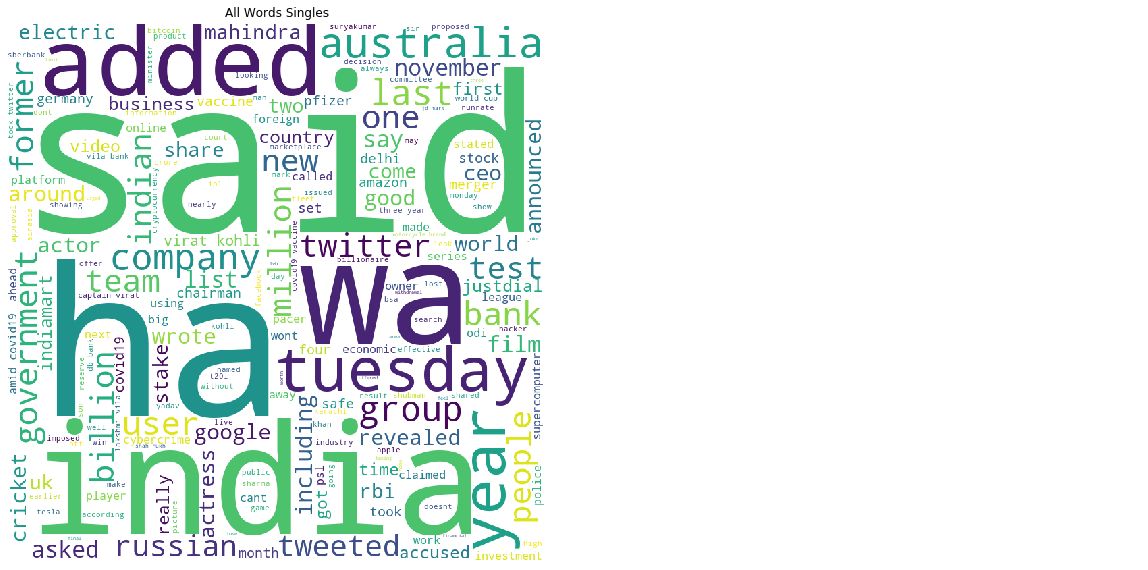

In [45]:
all_words_cloud = WordCloud(background_color='white',
                      height=800, width=800).generate(all_words)

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(all_words_cloud)

axs[0].set_title('All Words Singles')

for ax in axs: ax.axis('off')

In [46]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head() 

,topic,title,author,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words,bigrams
0,business,"Our COVID-19 vaccine 95% effective, has no ser...",Pragya Swastik,America's Pfizer said final results from late-...,americas pfizer said final results from latest...,americas pfizer said final results from latest...,america pfizer said final result from latestag...,america pfizer said final result latestage tri...,"[america, pfizer, said, final, result, latesta...","[(america, pfizer), (pfizer, said), (said, fin..."
1,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,the centre has imposed a 30day moratorium on l...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...,"[centre, ha, imposed, 30day, moratorium, laksh...","[(centre, ha), (ha, imposed), (imposed, 30day)..."
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,"[serum, institute, india, ceo, adar, poonawall...","[(serum, institute), (institute, india), (indi..."
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait on tuesday said a proposal t...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ...","[(trader, body), (body, cait), (cait, tuesday)..."
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ...","[(billionaire, elon), (elon, musk), (musk, add..."


In [47]:
all_words_bigrams = pd.Series(list(nltk.ngrams(all_words.split(), 2))).value_counts().head(20)
all_words_bigrams

(ha, said)                8
(world, cup)              5
(captain, virat)          5
(amid, covid19)           5
(virat, kohli)            5
(bank, india)             5
(motorcycle, brand)       4
(db, bank)                4
(india, captain)          4
(vila, bank)              4
(psl, 2020)               4
(shah, rukh)              4
(lakshmi, vila)           4
(took, twitter)           4
(covid19, vaccine)        4
(jd, mart)                4
(three, year)             4
(delhi, capital)          3
(every, day)              3
(microsoft, cofounder)    3
dtype: int64

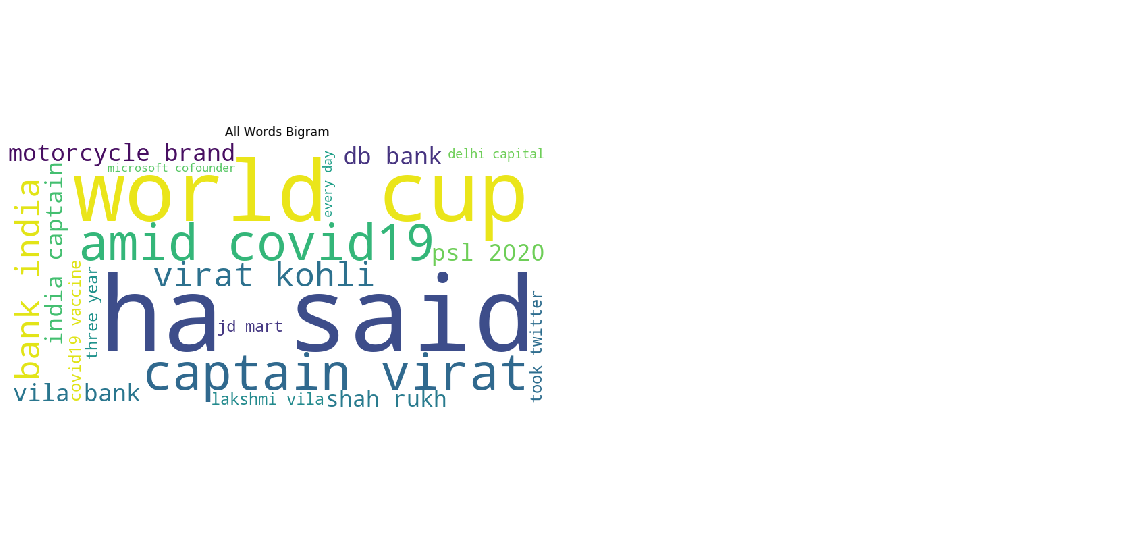

In [48]:
all_words_data = {k[0] + ' ' + k[1] : v for k, v in all_words_bigrams.to_dict().items()}

all_words_bigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(all_words_data)

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(all_words_bigram_cloud)

axs[0].set_title('All Words Bigram')

for ax in axs: ax.axis('off')

In [49]:
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]
df.head()

,topic,title,author,content,content_cleaned,content_tokenized,content_lemmatized,content_filtered,words,bigrams,trigrams
0,business,"Our COVID-19 vaccine 95% effective, has no ser...",Pragya Swastik,America's Pfizer said final results from late-...,americas pfizer said final results from latest...,americas pfizer said final results from latest...,america pfizer said final result from latestag...,america pfizer said final result latestage tri...,"[america, pfizer, said, final, result, latesta...","[(america, pfizer), (pfizer, said), (said, fin...","[(america, pfizer, said), (pfizer, said, final..."
1,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,the centre has imposed a 30day moratorium on l...,the centre has imposed a 30day moratorium on l...,the centre ha imposed a 30day moratorium on la...,centre ha imposed 30day moratorium lakshmi vil...,"[centre, ha, imposed, 30day, moratorium, laksh...","[(centre, ha), (ha, imposed), (imposed, 30day)...","[(centre, ha, imposed), (ha, imposed, 30day), ..."
2,business,Serum Institute's Adar Poonawalla defines what...,Krishna Veera Vanamali,Serum Institute of India CEO Adar Poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute of india ceo adar poonawalla t...,serum institute india ceo adar poonawalla took...,"[serum, institute, india, ceo, adar, poonawall...","[(serum, institute), (institute, india), (indi...","[(serum, institute, india), (institute, india,..."
3,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait on tuesday said a proposal t...,traders body cait on tuesday said a proposal t...,trader body cait on tuesday said a proposal to...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ...","[(trader, body), (body, cait), (cait, tuesday)...","[(trader, body, cait), (body, cait, tuesday), ..."
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion to his ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ...","[(billionaire, elon), (elon, musk), (musk, add...","[(billionaire, elon, musk), (elon, musk, added..."


In [50]:
all_words_trigrams = pd.Series(list(nltk.ngrams(all_words.split(), 3))).value_counts().head(20)
all_words_trigrams

(india, captain, virat)               4
(lakshmi, vila, bank)                 4
(captain, virat, kohli)               4
(db, bank, india)                     3
(last, three, year)                   3
(always, say, good)                   2
(owner, kkrs, shubman)                2
(least, 255, job)                     2
(first, time, last)                   2
(compilation, online, marketplace)    2
(indiamarts, allegation, baseless)    2
(day, office, going)                  2
(day, deputy, chairman)               2
(said, plan, resurrect)               2
(czech, motorcycle, brand)            2
(trading, crossing, 17000)            2
(resurrect, british, motorbike)       2
(mahindra, group, said)               2
(marking, alltime, high)              2
(court, alleging, copied)             2
dtype: int64

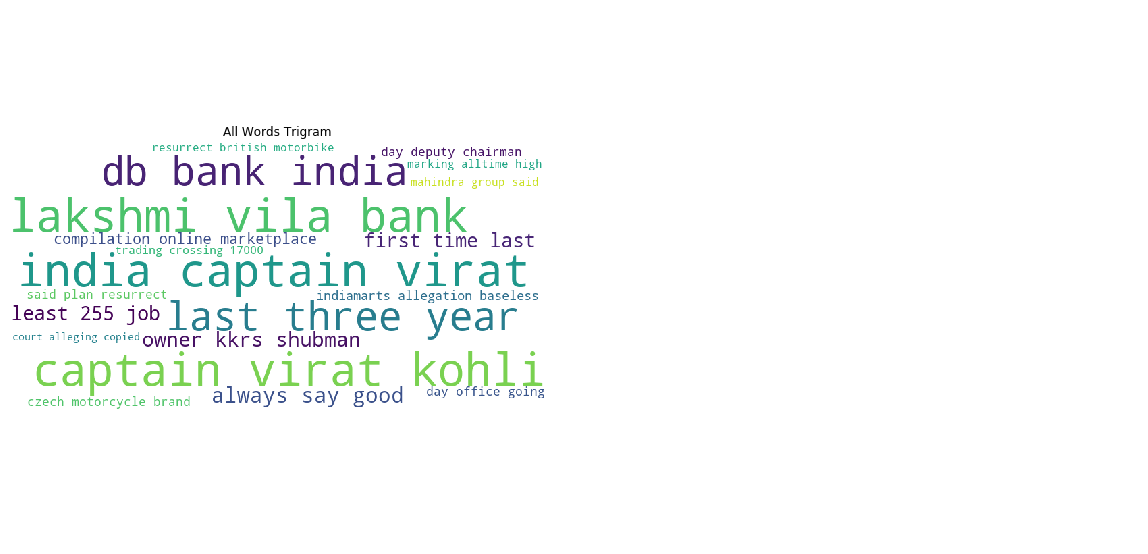

In [51]:
all_words_tridata = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in all_words_trigrams.to_dict().items()}

all_words_trigram_cloud = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(all_words_tridata) 

plt.figure(figsize=(15,15))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

axs[0].imshow(all_words_trigram_cloud)

axs[0].set_title('All Words Trigram')

for ax in axs: ax.axis('off')